# 2- Forecast using ( SVR -Ridge )

In [1]:
import pickle
import warnings
from math import sqrt

import lightgbm as lgb

import matplotlib as mpl
import numpy as np
import pandas as pd  # Basic library for all of our dataset operations
import tensorflow as tf
import xgboost as xgb
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# Extra settings
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8


In [2]:
#importing the dataset
df2= pd.read_csv('df_importance.csv',index_col=0)
df2.head(2)

,GDP_mp,Exp_electric,Imp_oil,Imp_cotton,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits
Date,,,,,,,
30/09/2005,153.5,123.1,1152.8,184.9,29674.4,355094,85937
31/12/2005,147.4,33.5,1406.0,194.2,29691.6,357643,86364


In [3]:
df=df2.copy()

In [4]:
df.tail()

,GDP_mp,Exp_electric,Imp_oil,Imp_cotton,Totel_External_Debt,Net_Domestic_Debt,Government_Deposits
Date,,,,,,,
30/06/2019,1007.4,452.3,2741.5,854.9,108699.1,3730857,610938
30/09/2019,976.1,544.7,3044.5,948.0,109362.6,3660597,621875
31/12/2019,1004.7,570.8,2733.7,966.5,112670.6,3826732,613583
31/03/2020,1024.4,406.5,2322.0,927.4,111292.2,3944089,675792
30/06/2020,990.0,352.0,800.7,705.6,123490.5,4361420,744391


In [5]:
x=df.drop(['GDP_mp'],axis=1)
y=df['GDP_mp']

In [6]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.18,random_state=123)

In [7]:
sc =  StandardScaler()

sc.fit(trainx)

trainx = sc.transform(trainx)
testx = sc.transform(testx)

x.shape

(60, 6)

# Support Vector Rrgression

In [8]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
svr_rbf = SVR(kernel="rbf", C=1000, gamma=0.009, epsilon=0.008)

In [9]:
svr_rbf.fit(trainx,trainy)
y_sv=svr_rbf.predict(testx)

In [10]:
y_sv_train=svr_rbf.predict(trainx)
RMSE_train=np.sqrt(mean_squared_error(trainy, y_sv_train))
RMSE_train

32.120714570678125

In [11]:
mean_squared_error(testy, y_sv)
RMSE_test = np.sqrt(mean_squared_error(testy, y_sv))
RMSE_test


32.47685556806836

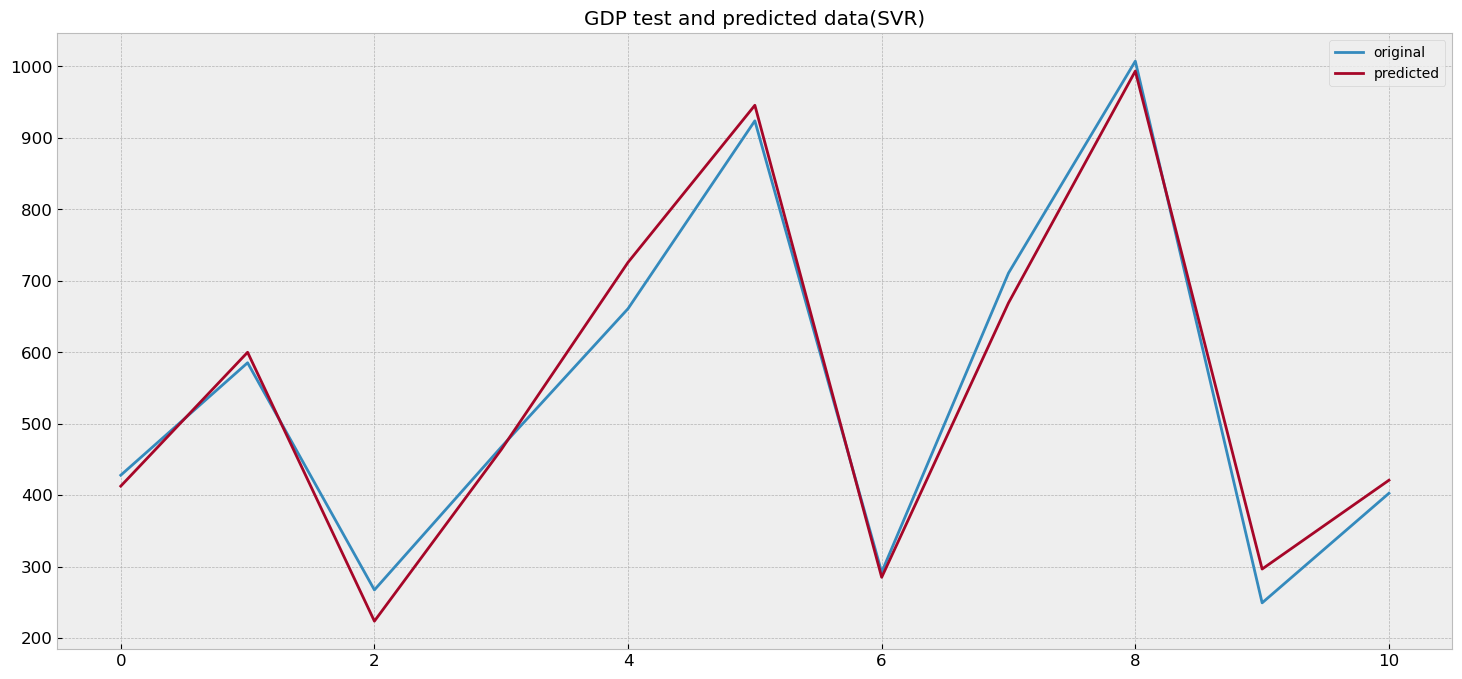

In [12]:
x_ax = range(len(testy))
plt.plot(x_ax, testy, label="original")
plt.plot(x_ax, y_sv, label="predicted")
plt.title("GDP test and predicted data(SVR)")
plt.legend()
plt.show()

# Ridge

In [13]:
trainy.shape

(49,)

In [14]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.134)
Ridge.fit(trainx, trainy)

Ridge(alpha=0.134)

In [15]:
trainPredict=Ridge.predict(trainx)
testPredict=Ridge.predict(testx)

In [16]:
import math
from sklearn.metrics import mean_squared_error
trainScore = math.sqrt(mean_squared_error(trainy, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testy, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 32.05 RMSE
Test Score: 32.36 RMSE


In [17]:
MAE_test=np.mean(np.abs(testPredict-testy))
MAE_train=np.mean(np.abs(trainPredict-trainy))
MAE_train,MAE_test

(25.309594610603547, 27.466207174938862)

In [18]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
mape(testy,testPredict),mape(trainy,trainPredict)

(5.8843068275782136, 6.076878902208601)

In [19]:
r_squared_ridge_no_lag = r2_score(testy, testPredict)

In [20]:
r_squared_ridge_no_lag

0.9827517390197474

In [21]:
testPredict

array([409.44991397, 623.11541923, 249.76539537, 443.48171987,
       738.2408299 , 937.74298147, 268.22608826, 699.56769769,
       981.43347022, 274.02859586, 429.82473784])

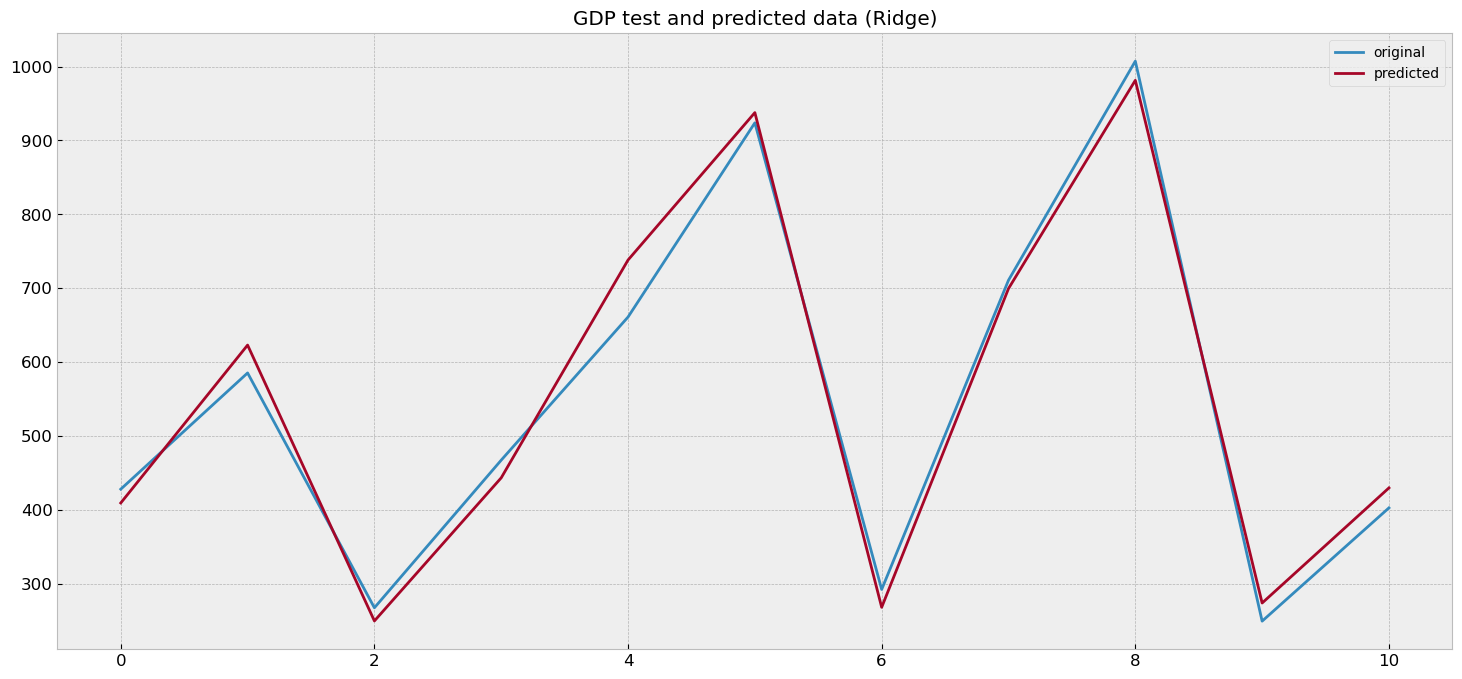

In [22]:
x_ax = range(len(testy))
plt.plot(x_ax, testy, label="original")
plt.plot(x_ax, testPredict, label="predicted")
plt.title("GDP test and predicted data (Ridge)")
plt.legend()
plt.show()

In [23]:
Ridge.get_params(deep=True)

{'alpha': 0.134,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [24]:
Ridge.intercept_,Ridge.coef_

(524.0183673469387,
 array([  20.16774679,   34.70662749,   34.30962765, -121.62676779,
         210.81092701,  141.65787041]))